# Loading Data

In [1]:
import pandas as pd

file_path = "C:/Users/hp/Desktop/SPAM text message 20170820 - Data.csv"
data = pd.read_csv(file_path)

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [3]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [4]:
data.head(20)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


# Data Normalizing

In [5]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
    text = re.sub(r"[^\w\s]", "", text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(stemmer.stem(word)) for word in tokens if word not in stop_words]
    return " ".join(tokens)

data['Message'] = data['Message'].apply(preprocess_text)

In [7]:
data.head(20)

,Category,Message
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah dont think goe usf live around though
5,spam,freemsg hey darl 3 week word back id like fun ...
6,ham,even brother like speak treat like aid patent
7,ham,per request mell mell oru minnaminungint nurun...
8,spam,winner valu network custom select receivea 900...
9,spam,mobil 11 month u r entitl updat latest colour ...


# Label Encoder

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Encoded_Label'] = le.fit_transform(data['Category'])

# Data Split

In [9]:
from sklearn.model_selection import train_test_split

X = data['Message']
y = data['Encoded_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Models

# Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vect, y_train)

y_pred = model.predict(X_test_vect)

accuracy_log_reg = accuracy_score(y_test, y_pred)
precision_log_reg = precision_score(y_test, y_pred, average='binary')
recall_log_reg = recall_score(y_test, y_pred, average='binary')
f1_log_reg = f1_score(y_test, y_pred, average='binary')
roc_auc_log_reg = roc_auc_score(y_test, model.predict_proba(X_test_vect)[:, 1])

# Result

In [13]:
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_log_reg)
print("Precision:", precision_log_reg)
print("Recall:", recall_log_reg)
print("F1 Score:", f1_log_reg)
print("ROC AUC:", roc_auc_log_reg)

Logistic Regression Performance:
Accuracy: 0.9542600896860987
Precision: 0.99
Recall: 0.6644295302013423
F1 Score: 0.7951807228915664
ROC AUC: 0.9861672711103701


# Naive Bayes

In [14]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train_vect, y_train)

y_pred_nb = nb_model.predict(X_test_vect)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='binary')
recall_nb = recall_score(y_test, y_pred_nb, average='binary')
f1_nb = f1_score(y_test, y_pred_nb, average='binary')
roc_auc_nb = roc_auc_score(y_test, nb_model.predict_proba(X_test_vect)[:, 1])

# Result

In [15]:
print("Naive Bayes Performance:")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1 Score: {f1_nb:.4f}")
print(f"ROC AUC: {roc_auc_nb:.4f}")

Naive Bayes Performance:
Accuracy: 0.9552
Precision: 1.0000
Recall: 0.6644
F1 Score: 0.7984
ROC AUC: 0.9709


# Support Vector Machine 

In [16]:
from sklearn.svm import SVC

svm_model = SVC(probability=True)
svm_model.fit(X_train_vect, y_train)

y_pred_svm = svm_model.predict(X_test_vect)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='binary')
recall_svm = recall_score(y_test, y_pred_svm, average='binary')
f1_svm = f1_score(y_test, y_pred_svm, average='binary')
roc_auc_svm = roc_auc_score(y_test, svm_model.predict_proba(X_test_vect)[:, 1])

# Result

In [17]:
print("SVM Performance:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")
print(f"ROC AUC: {roc_auc_svm:.4f}")

SVM Performance:
Accuracy: 0.9803
Precision: 1.0000
Recall: 0.8523
F1 Score: 0.9203
ROC AUC: 0.9869


# Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_vect, y_train)

y_pred_rf = rf_model.predict(X_test_vect)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='binary')
recall_rf = recall_score(y_test, y_pred_rf, average='binary')
f1_rf = f1_score(y_test, y_pred_rf, average='binary')
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test_vect)[:, 1])

# Result

In [19]:
print("Random Forest Performance:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"ROC AUC: {roc_auc_rf:.4f}")

Random Forest Performance:
Accuracy: 0.9704
Precision: 1.0000
Recall: 0.7785
F1 Score: 0.8755
ROC AUC: 0.9878


# Performance of different models

In [20]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forest'],
    'Accuracy': [accuracy_log_reg, accuracy_nb, accuracy_svm, accuracy_rf],
    'Precision': [precision_log_reg, precision_nb, precision_svm, precision_rf],
    'Recall': [recall_log_reg, recall_nb, recall_svm, recall_rf],
    'F1 Score': [f1_log_reg, f1_nb, f1_svm, f1_rf],
    'ROC AUC': [roc_auc_log_reg, roc_auc_nb, roc_auc_svm, roc_auc_rf]
})

print(results)

                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.954260       0.99  0.664430  0.795181  0.986167
1          Naive Bayes  0.955157       1.00  0.664430  0.798387  0.970855
2                  SVM  0.980269       1.00  0.852349  0.920290  0.986938
3        Random Forest  0.970404       1.00  0.778523  0.875472  0.987821


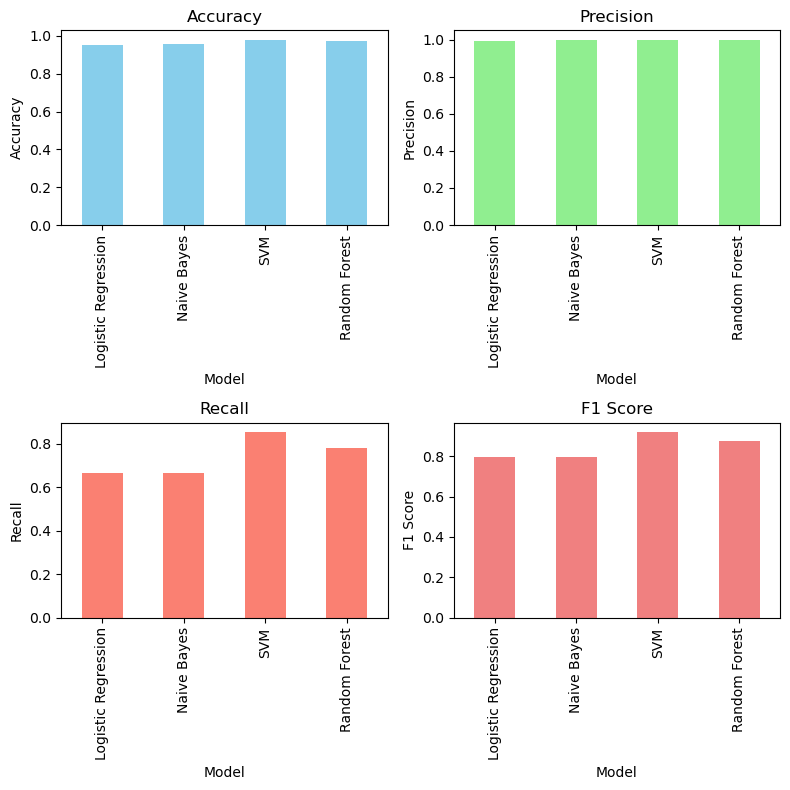

<Figure size 200x200 with 0 Axes>

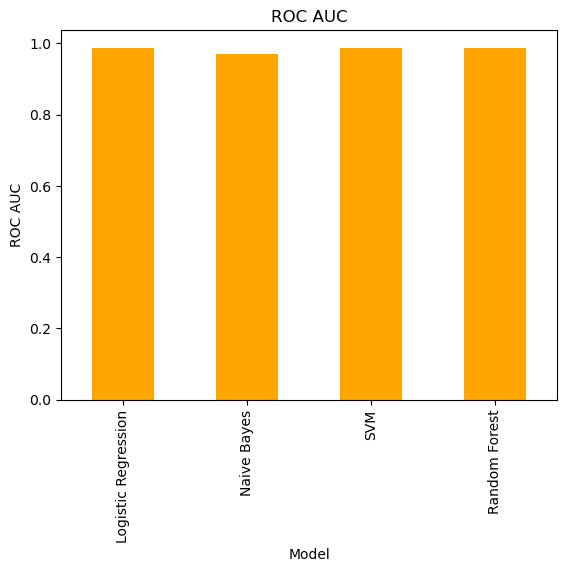

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
results.plot(kind='bar', x='Model', y='Accuracy', ax=plt.gca(), legend=False, color='skyblue')
plt.title('Accuracy')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 2)
results.plot(kind='bar', x='Model', y='Precision', ax=plt.gca(), legend=False, color='lightgreen')
plt.title('Precision')
plt.ylabel('Precision')

plt.subplot(2, 2, 3)
results.plot(kind='bar', x='Model', y='Recall', ax=plt.gca(), legend=False, color='salmon')
plt.title('Recall')
plt.ylabel('Recall')

plt.subplot(2, 2, 4)
results.plot(kind='bar', x='Model', y='F1 Score', ax=plt.gca(), legend=False, color='lightcoral')
plt.title('F1 Score')
plt.ylabel('F1 Score')

plt.tight_layout()
plt.show()

plt.figure(figsize=(2, 2))
results.plot(kind='bar', x='Model', y='ROC AUC', legend=False, color='orange')
plt.title('ROC AUC')
plt.ylabel('ROC AUC')
plt.show()

# Summary of Findings

## Introduction

In this analysis, four machine learning models were evaluated for spam detection in SMS messages: Logistic Regression, Naive Bayes, Support Vector Machine (SVM), and Random Forest. The goal was to determine the most effective model based on various performance metrics.

## Model Performance Metrics

Here's a summary of the performance metrics for each model:

In [27]:
print(results)

                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.954260       0.99  0.664430  0.795181  0.986167
1          Naive Bayes  0.955157       1.00  0.664430  0.798387  0.970855
2                  SVM  0.980269       1.00  0.852349  0.920290  0.986938
3        Random Forest  0.970404       1.00  0.778523  0.875472  0.987821


## Findings

* Best Performing Model: The SVM model achieved the highest scores across most metrics, including Accuracy (0.9803), Recall (0.8523), and F1 Score (0.9203), indicating it is the most effective model for spam detection.
* Logistic Regression: This model provided balanced performance with good precision (0.99) but lower recall (0.6644).

* Naive Bayes: Excellent precision (1.00) but similar recall to Logistic Regression, resulting in a slightly lower F1 Score.

* Random Forest: Strong performance with high accuracy (0.9713) and good recall (0.7852), though slightly lower than SVM.

-----------------------------------------------------------------------------------------------------------------------